This notebook provides visualisation of PM2.5 pollution in five Chinese cities.
Data set comes from https://archive.ics.uci.edu/ml/datasets/PM2.5+Data+of+Five+Chinese+Cities#

In [1]:
import os

directory = os.getcwd() + '/input/'
inputs = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".csv"):
        inputs.append(os.path.join(directory, filename))
    else:
        continue

In [2]:
import pandas as pd
df_Shanghai = pd.read_csv(inputs[0])
df_Beijing = pd.read_csv(inputs[1])
df_Shenyang = pd.read_csv(inputs[2])
df_Chengdu = pd.read_csv(inputs[3])
df_Guangzhou = pd.read_csv(inputs[4])

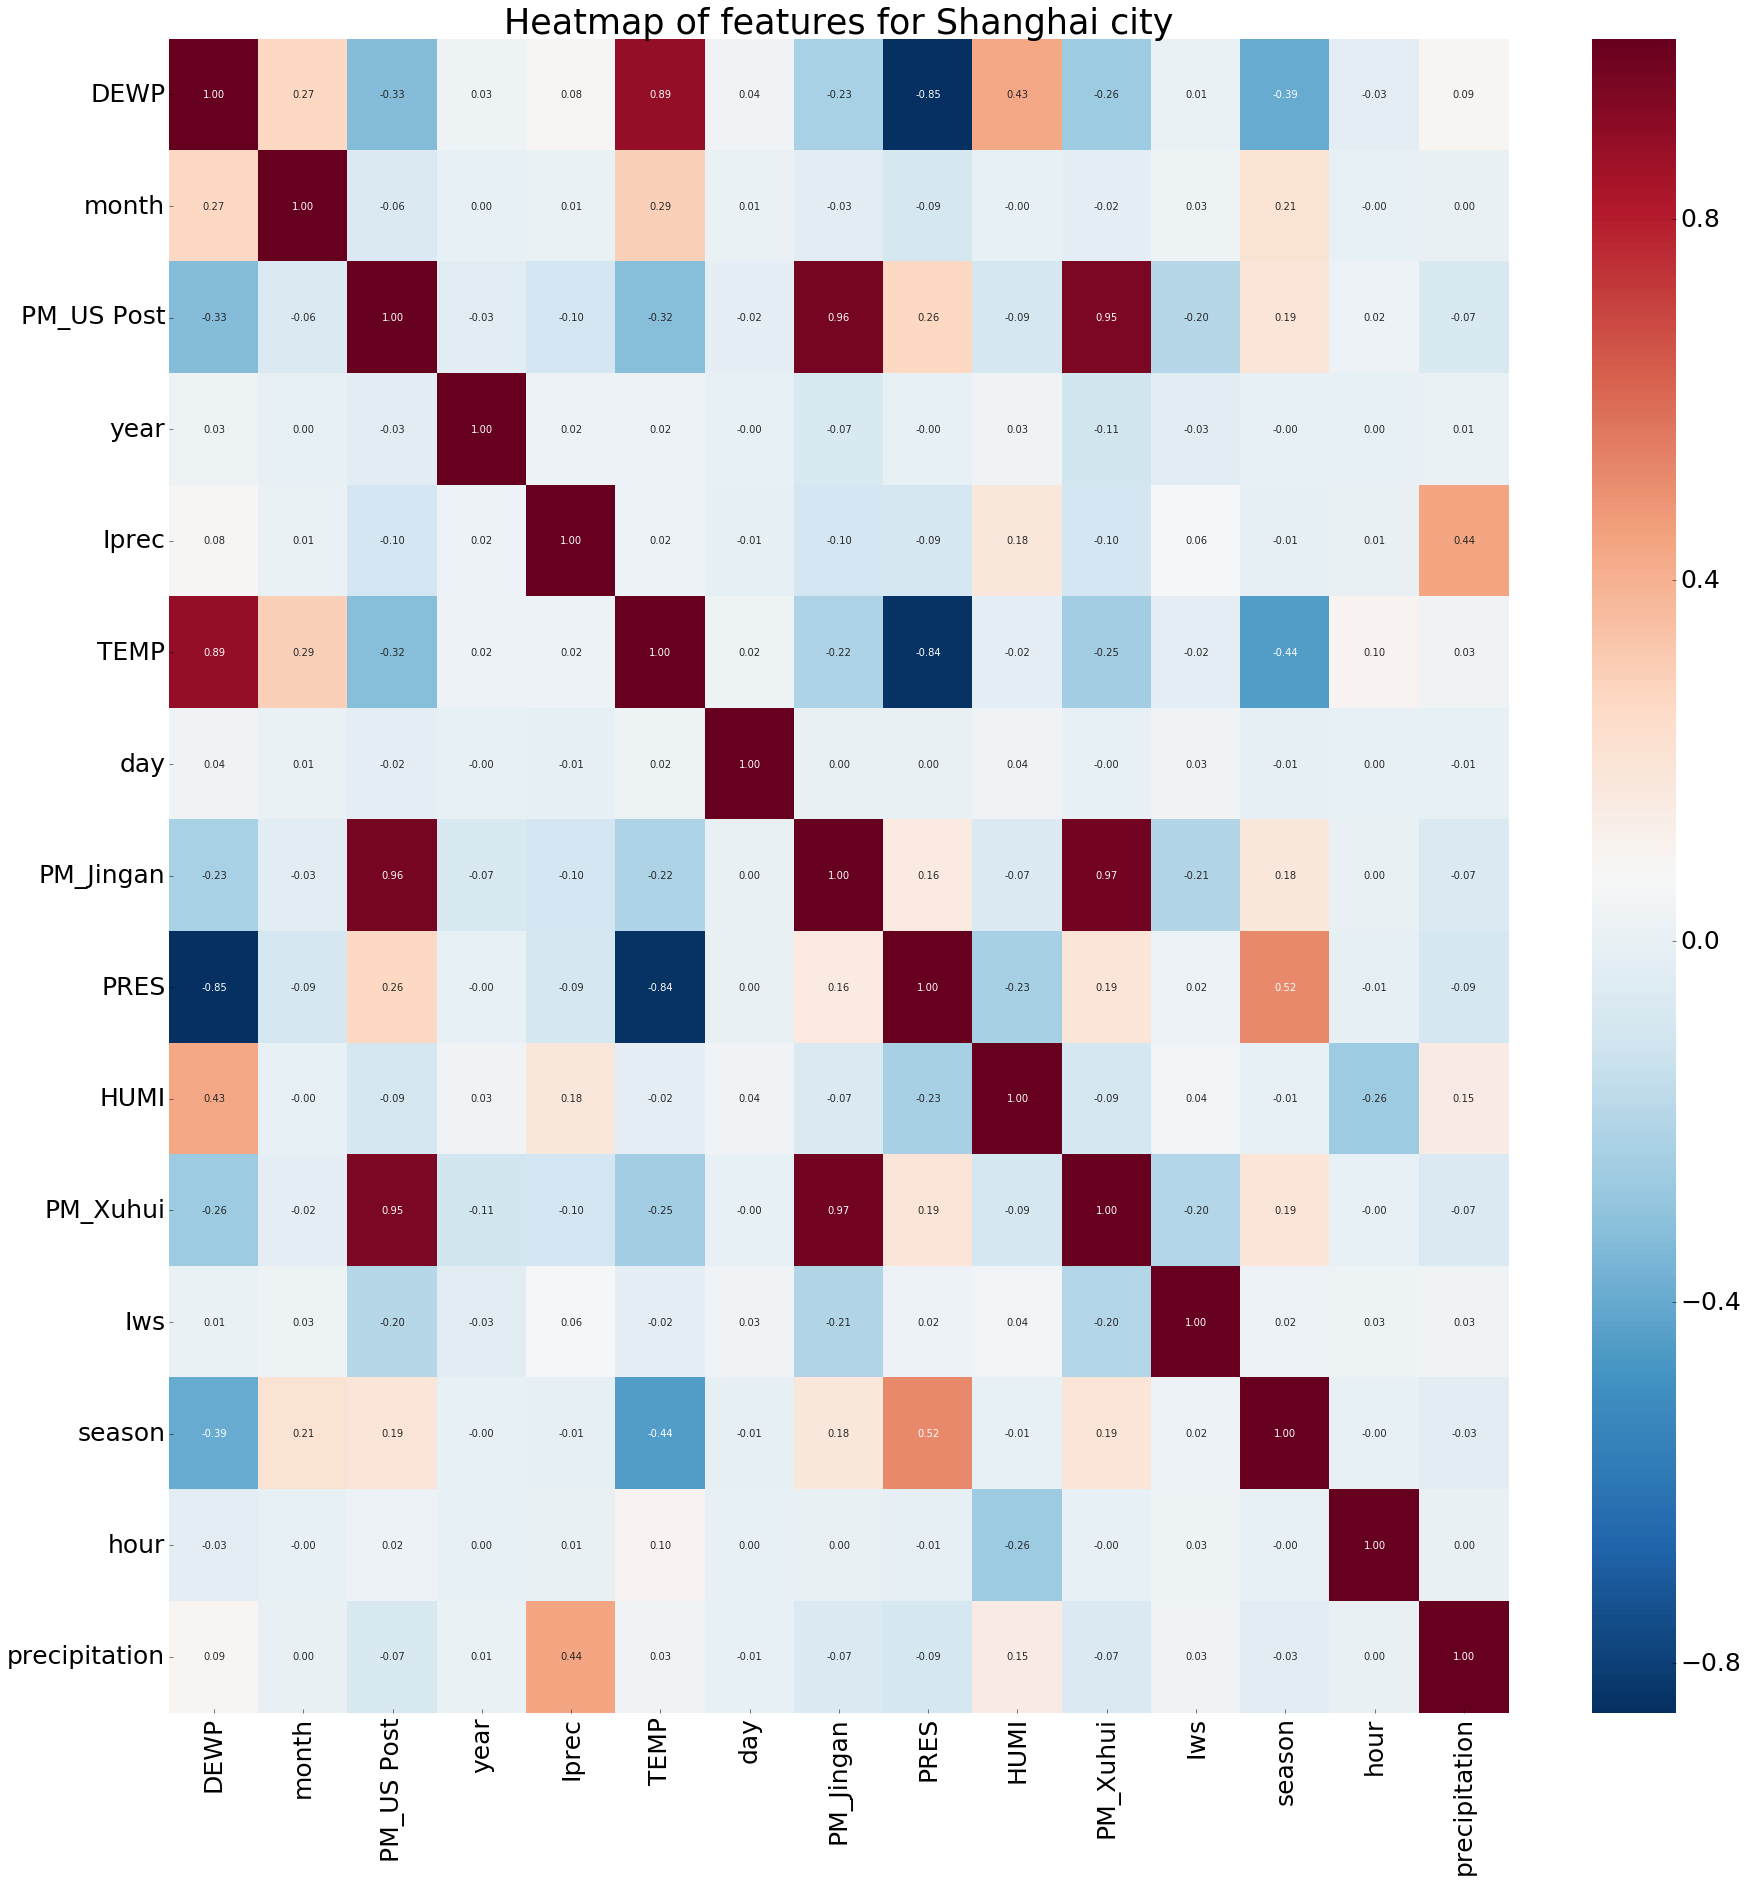

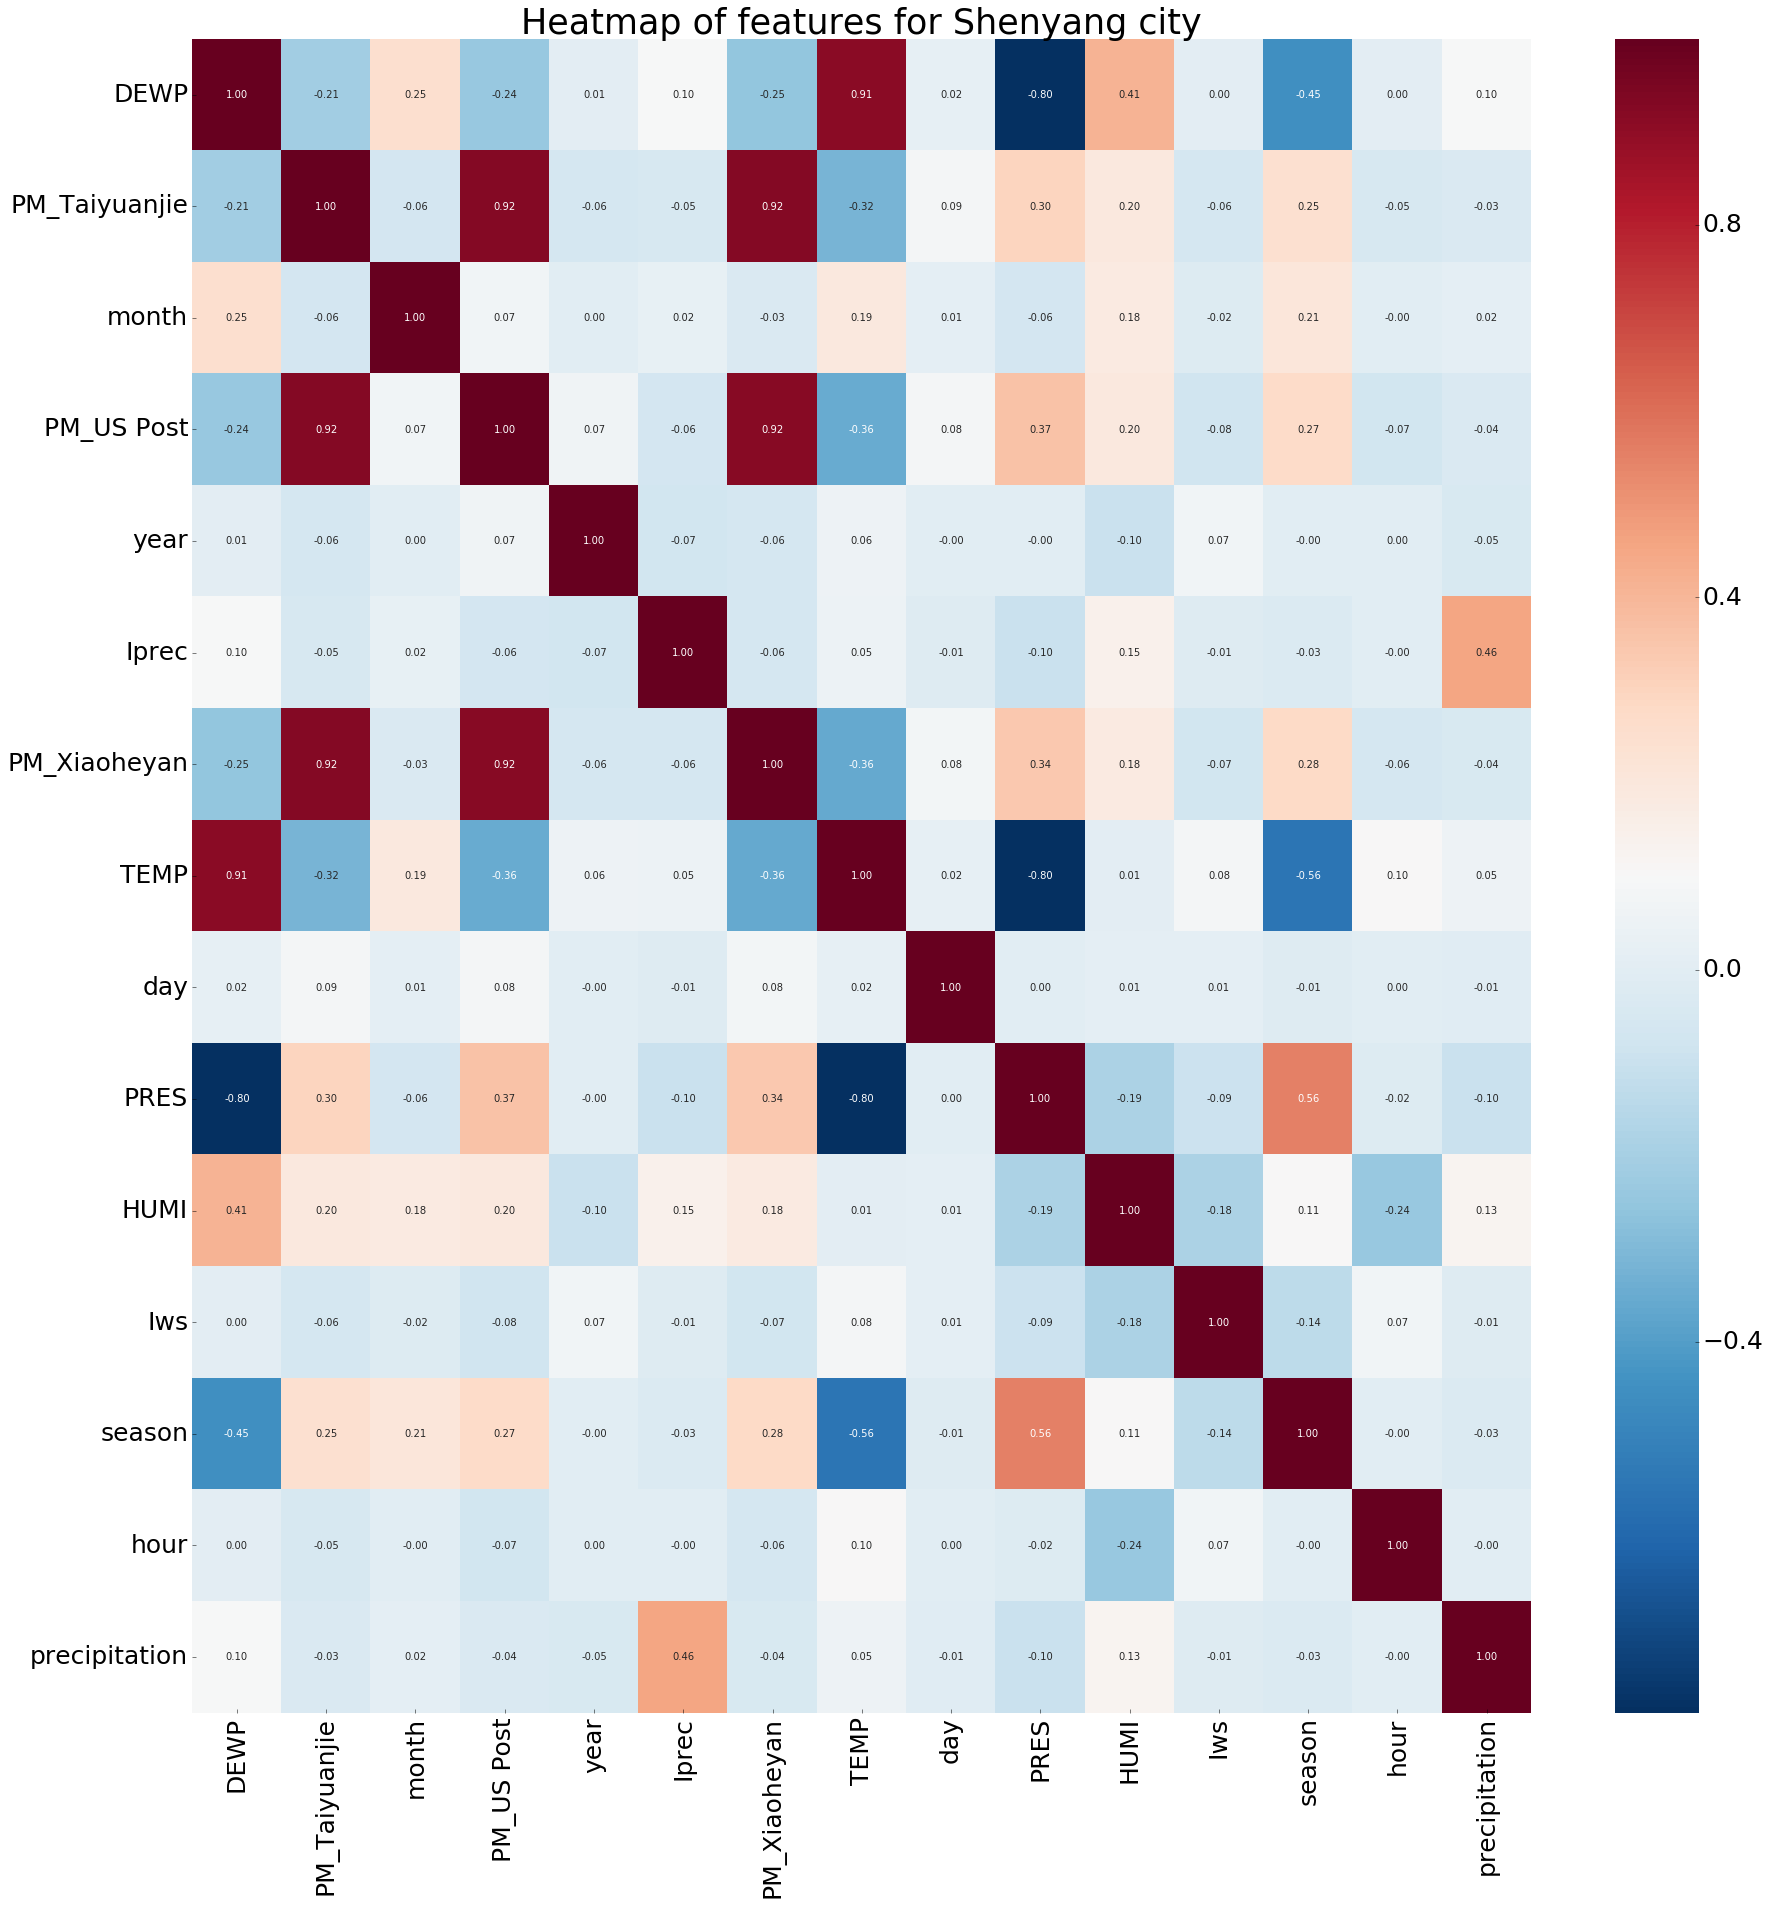

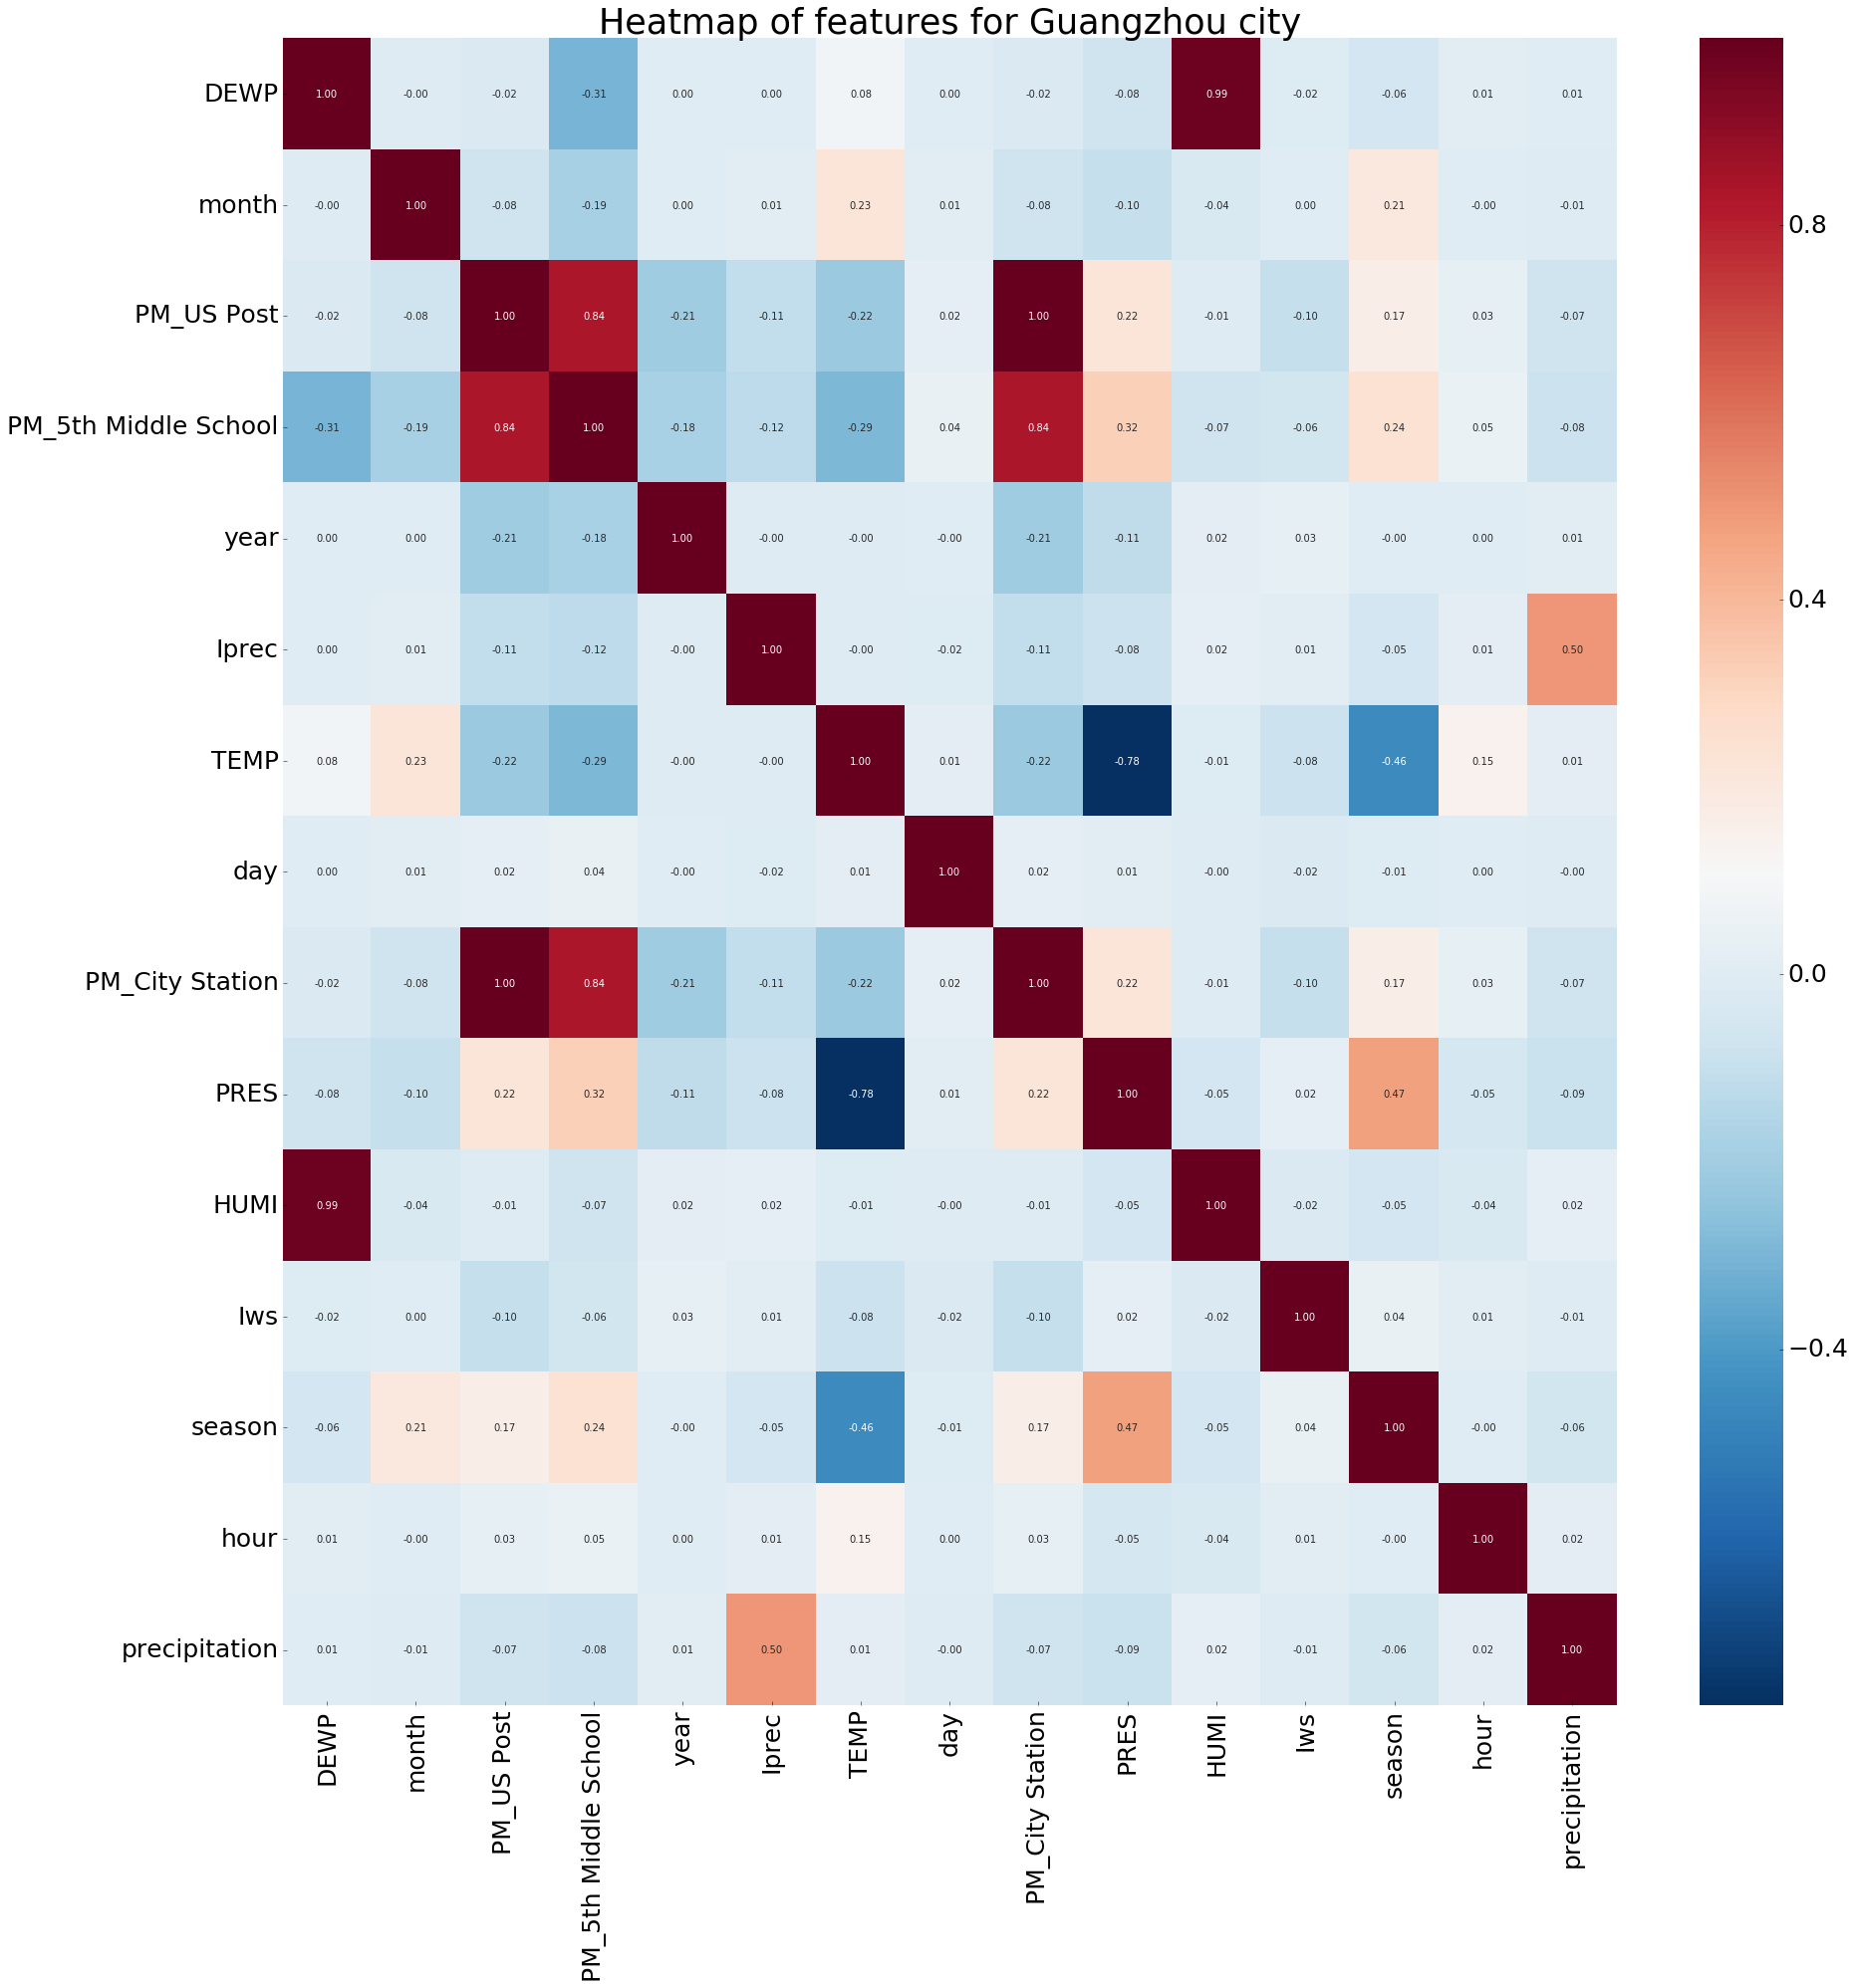

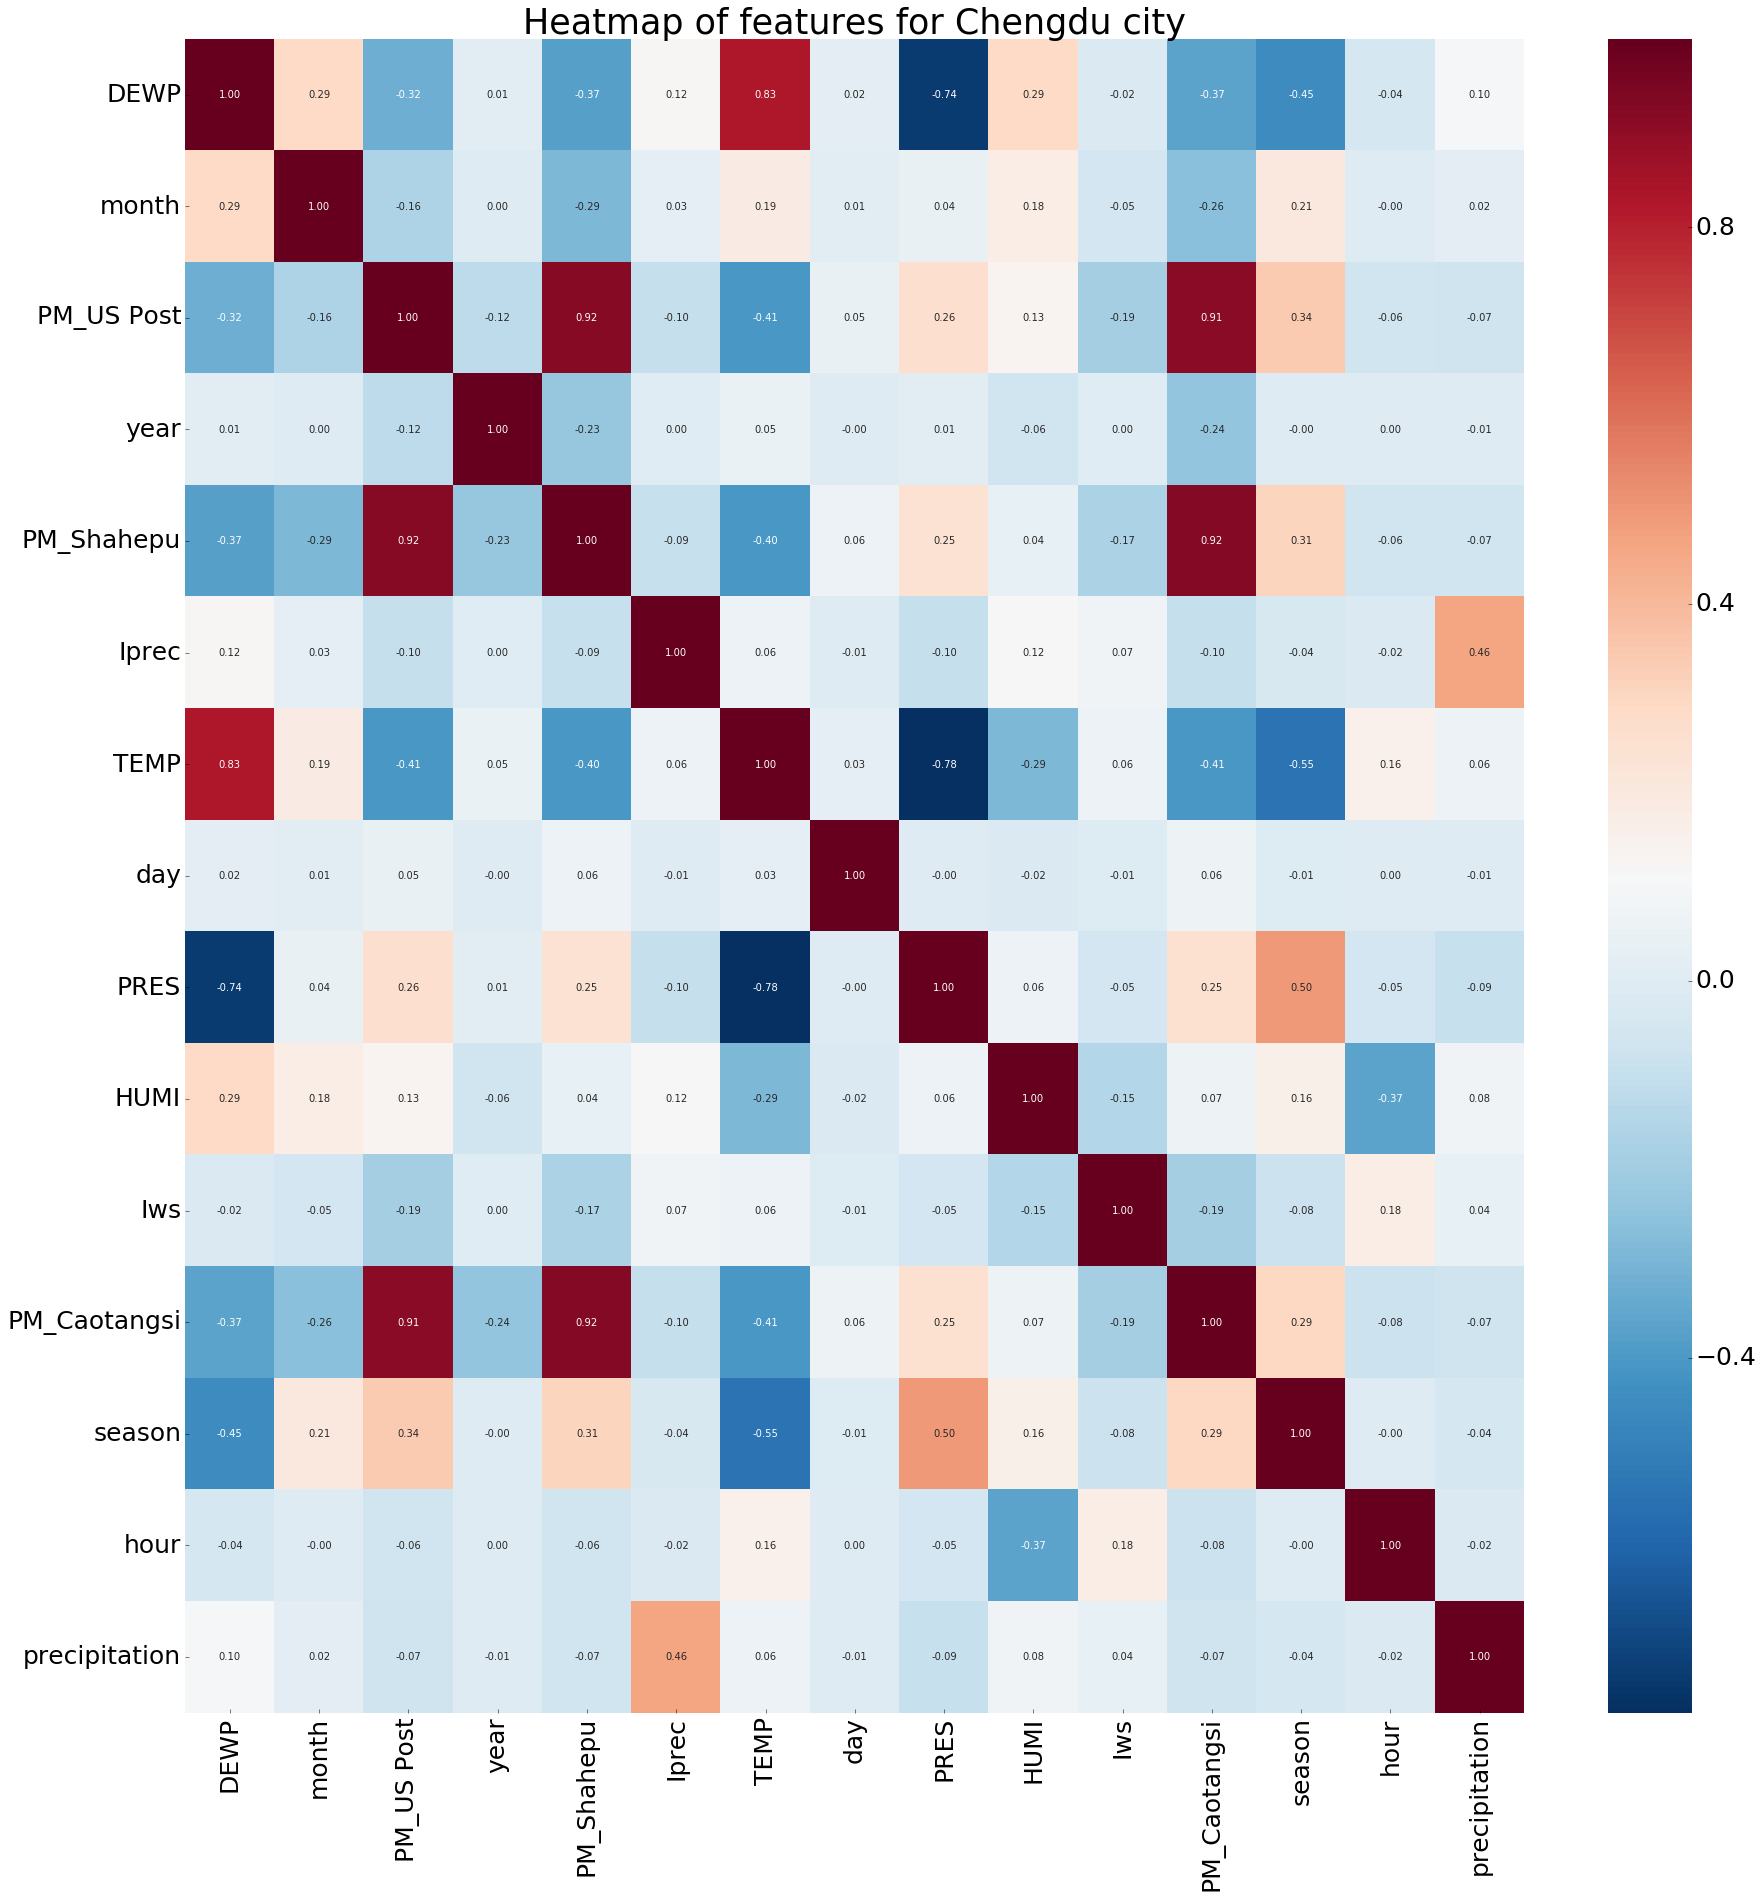

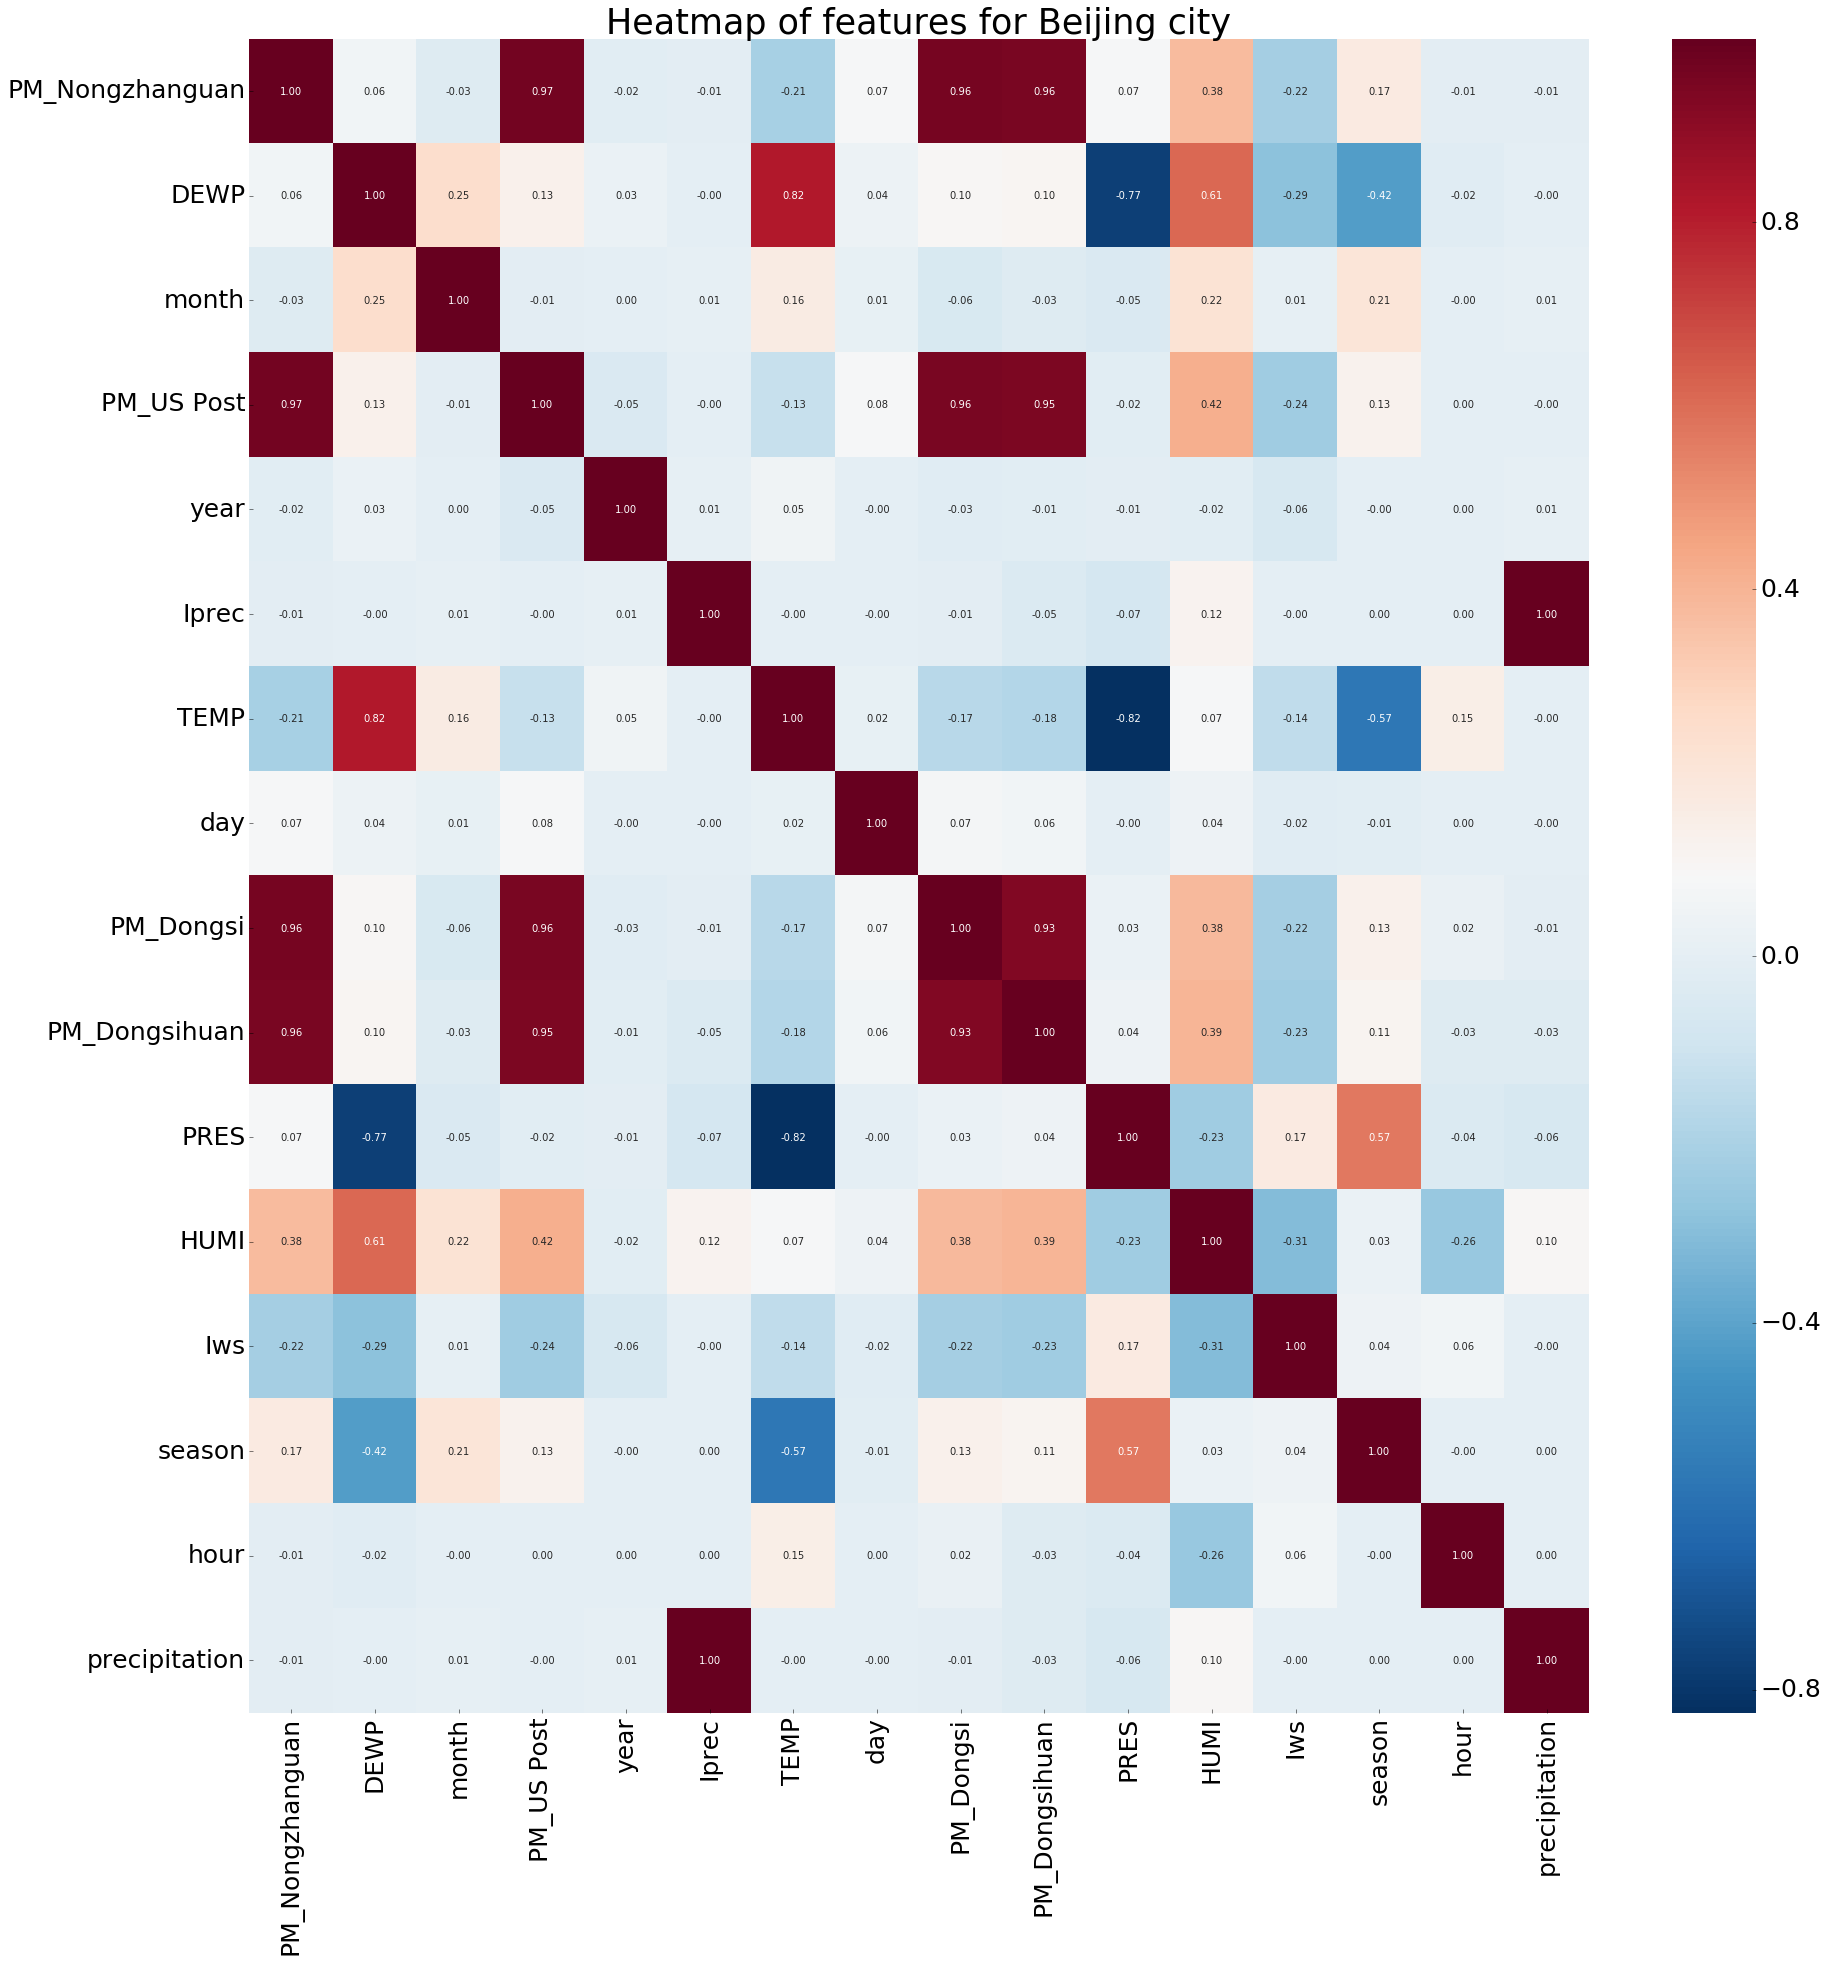

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

dict_zones = {'Shanghai': df_Shanghai, 'Beijing': df_Beijing, 'Shenyang': df_Shenyang,
             'Chengdu': df_Chengdu, 'Guangzhou': df_Guangzhou}

columns_to_exclude = ['No']

for key, value in dict_zones.items():
    columns_all = value.columns.tolist()
    columns_keep = set(columns_all) - set(columns_to_exclude)
    df_hm = value[list(columns_keep)]
    cor = df_hm.corr()               #Pearson correlation coefficients
      
    fig = plt.figure(figsize=(30, 30))
    hm = sns.heatmap(cor, annot=True, fmt=".2f", cmap='RdBu_r')
    plt.title('Heatmap of features for '+key+' city', fontsize=35)
    plt.xticks(fontsize=25, rotation='vertical')
    plt.yticks(fontsize=25, rotation='horizontal')
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=25)
    plt.show()
    
del df_hm


In [4]:
df_Shanghai['Date'] = pd.to_datetime(df_Shanghai.year*10000+df_Shanghai.month*100+df_Shanghai.day,format='%Y%m%d')
df_Beijing['Date'] = pd.to_datetime(df_Beijing.year*10000+df_Beijing.month*100+df_Beijing.day,format='%Y%m%d')
df_Shenyang['Date'] = pd.to_datetime(df_Shenyang.year*10000+df_Shenyang.month*100+df_Shenyang.day,format='%Y%m%d')
df_Chengdu['Date'] = pd.to_datetime(df_Chengdu.year*10000+df_Chengdu.month*100+df_Chengdu.day,format='%Y%m%d')
df_Guangzhou['Date'] = pd.to_datetime(df_Guangzhou.year*10000+df_Guangzhou.month*100+df_Guangzhou.day,format='%Y%m%d')

In [5]:
df_Shanghai.set_index(df_Shanghai['Date'],inplace=True)
df_Beijing.set_index(df_Beijing['Date'],inplace=True)
df_Shenyang.set_index(df_Shenyang['Date'],inplace=True)
df_Chengdu.set_index(df_Chengdu['Date'],inplace=True)
df_Guangzhou.set_index(df_Guangzhou['Date'],inplace=True)

In [6]:
#df_Shanghai.set_index(['month', 'day'], inplace=True)
#df_Beijing.set_index(['month', 'day'], inplace=True)
#df_Shenyang.set_index(['month', 'day'], inplace=True)
#df_Chengdu.set_index(['month', 'day'], inplace=True)
#df_Guangzhou.set_index(['month', 'day'], inplace=True)

In [7]:
df_Shanghai = df_Shanghai[['PM_Jingan', 'PM_US Post', 'PM_Xuhui']]
df_Beijing = df_Beijing[['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post']]
df_Shenyang = df_Shenyang[['PM_Taiyuanjie', 'PM_US Post', 'PM_Xiaoheyan']]
df_Chengdu = df_Chengdu[['PM_Caotangsi', 'PM_Shahepu', 'PM_US Post']]
df_Guangzhou = df_Guangzhou[['PM_City Station', 'PM_5th Middle School', 'PM_US Post']]

In [8]:
df_Shanghai['Shanghai_PM_mean'] = df_Shanghai[['PM_Jingan', 'PM_US Post', 'PM_Xuhui']].mean(axis=1)
df_Beijing['Beijing_PM_mean'] = df_Shanghai[['PM_Jingan', 'PM_US Post', 'PM_Xuhui']].mean(axis=1)
df_Shenyang['Shenyang_PM_mean'] = df_Shanghai[['PM_Jingan', 'PM_US Post', 'PM_Xuhui']].mean(axis=1)
df_Chengdu['Chengdu_PM_mean'] = df_Shanghai[['PM_Jingan', 'PM_US Post', 'PM_Xuhui']].mean(axis=1)
df_Guangzhou['Guangzhou_PM_mean'] = df_Shanghai[['PM_Jingan', 'PM_US Post', 'PM_Xuhui']].mean(axis=1)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [9]:
#df_Shanghai = df_Shanghai['Shanghai_PM_mean']
#df_Beijing = df_Beijing['Beijing_PM_mean']
#df_Shenyang = df_Shenyang['Shenyang_PM_mean']
#df_Chengdu = df_Chengdu['Chengdu_PM_mean']
#df_Guangzhou = df_Guangzhou['Guangzhou_PM_mean']

In [10]:
Shanghai = df_Shanghai['Shanghai_PM_mean']
Beijing = df_Beijing['Beijing_PM_mean']
Shenyang = df_Shenyang['Shenyang_PM_mean']
Chengdu = df_Chengdu['Chengdu_PM_mean']
Guangzhou = df_Guangzhou['Guangzhou_PM_mean']

In [27]:
df = pd.DataFrame()
df['Shanghai_PM_mean'] = Shanghai
df['Beijing_PM_mean'] = Beijing
df['Shenyang_PM_mean'] = Chengdu
df['Guangzhou_PM_mean'] = Guangzhou
df

,Shanghai_PM_mean,Beijing_PM_mean,Shenyang_PM_mean,Guangzhou_PM_mean
Date,,,,
2010-01-01,NaN,NaN,NaN,NaN
2010-01-01,NaN,NaN,NaN,NaN
2010-01-01,NaN,NaN,NaN,NaN
2010-01-01,NaN,NaN,NaN,NaN
2010-01-01,NaN,NaN,NaN,NaN
2010-01-01,NaN,NaN,NaN,NaN
2010-01-01,NaN,NaN,NaN,NaN
2010-01-01,NaN,NaN,NaN,NaN
2010-01-01,NaN,NaN,NaN,NaN


In [30]:
#df_Beijing = df_Beijing.resample('1d').mean()
PM_mean=df.groupby([df.index.day,df.index.month]).mean()
PM_min=df.groupby([df.index.day,df.index.month]).min()
PM_max=df.groupby([df.index.day,df.index.month]).max()

In [36]:
PM_mean['PM_mean'] = PM_mean.mean(axis=1)
PM_min['PM_min'] = PM_min.min(axis=1)
PM_max['PM_max'] = PM_max.max(axis=1)

In [61]:
import datetime as dt
dt.date(2017,1,1)

datetime.date(2017, 1, 1)

In [116]:
import calendar
base = dt.date(2017,1,1)
date_list = [base + datetime.timedelta(days=x) for x in range(0, 365)]
date_list = [calendar.month_name[x.month] for x in date_list]
#calendar.month_name[date_list[0].month]
date_list

['January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'Ma

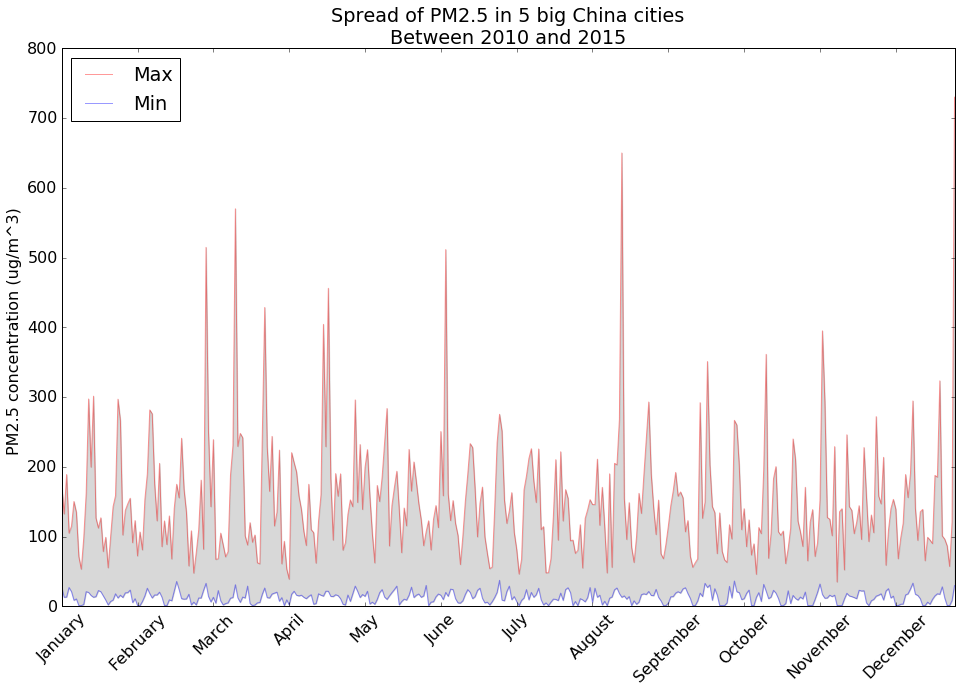

In [120]:
import matplotlib
import numpy as np

x = np.arange(0,len(PM_mean),1)
y1 = PM_max['PM_max'].values
y2 = PM_mean['PM_mean'].values
y3 = PM_min['PM_min'].values

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)
plt.figure(figsize=(16, 10))
plt.title('Spread of PM2.5 in 5 big China cities\nBetween 2010 and 2015')
plt.plot(x, y1, color='red', alpha=0.4)
#plt.plot(x, y2, color='grey', alpha=0.8) 
plt.plot(x,y3, color='blue', alpha=0.4)
plt.xticks(x[::31], date_list[::31], rotation=45)
#plt.xticks(date_list)
plt.legend(['Max', 'Min'], loc=2)
plt.fill_between(x, y1, y3, color='grey', alpha=0.3)
plt.ylabel('PM2.5 concentration (ug/m^3) ')
plt.show()